<a href="https://colab.research.google.com/github/PhucThinh20146028/BTAI/blob/main/AI_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6be0c1165a350e8091e3554292b600707f17e04e58f8682bfcf5080fb41d3740
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


127.5


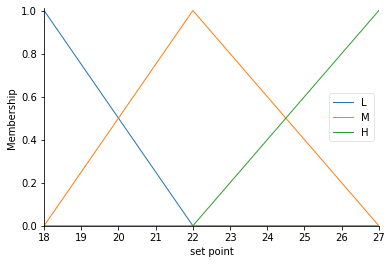

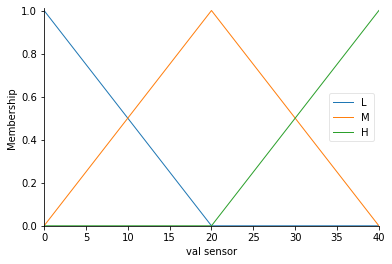

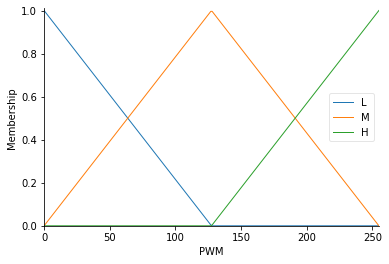

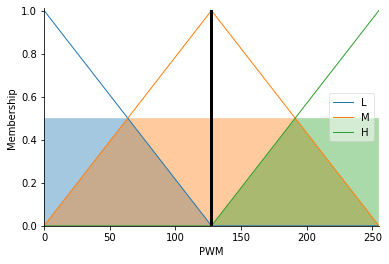

In [ ]:
#DC motor

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

setpoint = ctrl.Antecedent(np.arange(18,28,1),'set point')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val sensor')
PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')

setpoint['L'] = fuzz.trimf(setpoint.universe,[18,18,22])
setpoint['M'] = fuzz.trimf(setpoint.universe,[18,22,27])
setpoint['H'] = fuzz.trimf(setpoint.universe,[22,27,27])


val_sensor['L'] = fuzz.trimf(val_sensor.universe,[0,0,20])
val_sensor['M'] = fuzz.trimf(val_sensor.universe,[0,20,40])
val_sensor['H'] = fuzz.trimf(val_sensor.universe,[20,40,40])


PWM['L'] = fuzz.trimf(PWM.universe,[0,0,127.5])
PWM['M'] = fuzz.trimf(PWM.universe,[0,127.5,255])
PWM['H'] = fuzz.trimf(PWM.universe,[127.5,255,255])


setpoint.view()
val_sensor.view()
PWM.view()

rule1 = ctrl.Rule(setpoint['L'] & val_sensor['L'], PWM['L'])
rule2 = ctrl.Rule(setpoint['L'] & val_sensor['M'], PWM['L'])
rule3 = ctrl.Rule(setpoint['L'] & val_sensor['H'], PWM['M'])
rule4 = ctrl.Rule(setpoint['M'] & val_sensor['L'], PWM['L'])
rule5 = ctrl.Rule(setpoint['M'] & val_sensor['M'], PWM['M'])
rule6 = ctrl.Rule(setpoint['M'] & val_sensor['H'], PWM['H'])
rule7 = ctrl.Rule(setpoint['H'] & val_sensor['L'], PWM['M'])
rule8 = ctrl.Rule(setpoint['H'] & val_sensor['M'], PWM['H'])
rule9 = ctrl.Rule(setpoint['H'] & val_sensor['H'], PWM['H'])

DC_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
DC= ctrl.ControlSystemSimulation(DC_ctrl)

DC.input['set point'] = 20
DC.input['val sensor'] = 30

DC.compute()
print(DC.output['PWM'])
PWM.view(sim = DC)

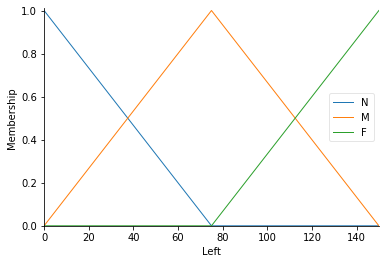

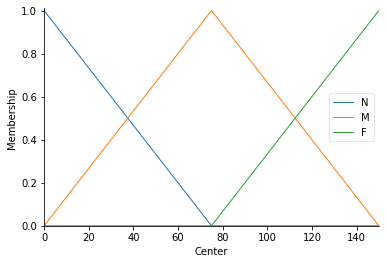

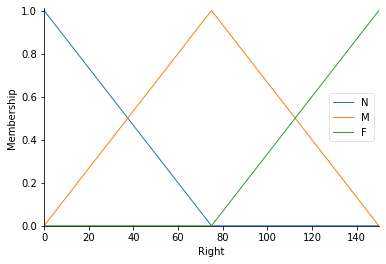

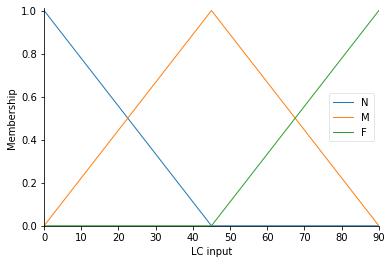

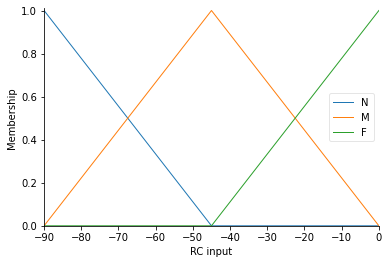

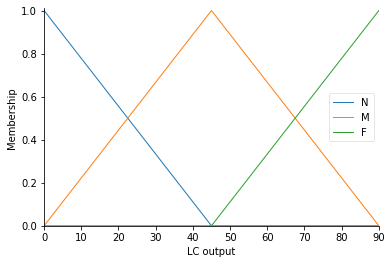

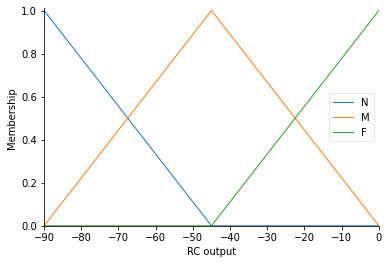

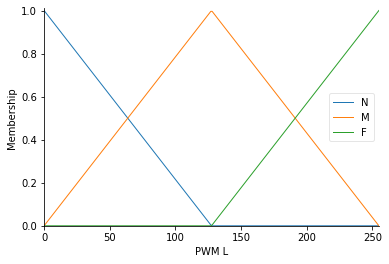

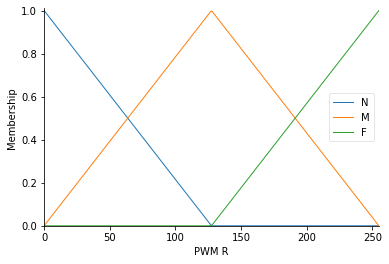

In [26]:
# mobile robot

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

L = ctrl.Antecedent(np.arange(0,151,1),'Left')
C = ctrl.Antecedent(np.arange(0,151,1),'Center')
R = ctrl.Antecedent(np.arange(0,151,1),'Right')
LC_input = ctrl.Antecedent(np.arange(0,91,1),'LC input')
RC_input = ctrl.Antecedent(np.arange(-90,1,1),'RC input')
LC_output = ctrl.Consequent(np.arange(0,91,1),'LC output')
RC_output = ctrl.Consequent(np.arange(-90,1,1),'RC output')
PWM_L = ctrl.Consequent(np.arange(0,256,1),'PWM L')
PWM_R = ctrl.Consequent(np.arange(0,256,1),'PWM R')

L['N'] = fuzz.trimf(L.universe,[0,0,75])
L['M'] = fuzz.trimf(L.universe,[0,75,150])
L['F'] = fuzz.trimf(L.universe,[75,150,150])

C['N'] = fuzz.trimf(C.universe,[0,0,75])
C['M'] = fuzz.trimf(C.universe,[0,75,150])
C['F'] = fuzz.trimf(C.universe,[75,150,150])

R['N'] = fuzz.trimf(R.universe,[0,0,75])
R['M'] = fuzz.trimf(R.universe,[0,75,150])
R['F'] = fuzz.trimf(R.universe,[75,150,150])

LC_input['S'] = fuzz.trimf(LC_input.universe,[0,0,45])
LC_input['N'] = fuzz.trimf(LC_input.universe,[0,45,90])
LC_input['B'] = fuzz.trimf(LC_input.universe,[45,90,90])

RC_input['B'] = fuzz.trimf(RC_input.universe,[-90,-90,-45])
RC_input['N'] = fuzz.trimf(RC_input.universe,[-90,-45,0])
RC_input['S'] = fuzz.trimf(RC_input.universe,[-45,0,0])

LC_output['S'] = fuzz.trimf(LC_output.universe,[0,0,45])
LC_output['N'] = fuzz.trimf(LC_output.universe,[0,45,90])
LC_output['B'] = fuzz.trimf(LC_output.universe,[45,90,90])

RC_output['B'] = fuzz.trimf(RC_output.universe,[-90,-90,-45])
RC_output['N'] = fuzz.trimf(RC_output.universe,[-90,-45,0])
RC_output['S'] = fuzz.trimf(RC_output.universe,[-45,0,0])

PWM_L['N'] = fuzz.trimf(PWM_L.universe,[0,0,127.5])
PWM_L['M'] = fuzz.trimf(PWM_L.universe,[0,127.5,255])
PWM_L['F'] = fuzz.trimf(PWM_L.universe,[127.5,255,255])

PWM_R['N'] = fuzz.trimf(PWM_R.universe,[0,0,127.5])
PWM_R['M'] = fuzz.trimf(PWM_R.universe,[0,127.5,255])
PWM_R['F'] = fuzz.trimf(PWM_R.universe,[127.5,255,255])


L.view()
C.view()
R.view()
LC_input.view()
RC_input.view()
LC_output.view()
RC_output.view()
PWM_L.view()
PWM_R.view()

rule1 = ctrl.Rule(L['N'] & C['N'], LC_input['S'])
rule2 = ctrl.Rule(L['N'] & C['M'], LC_input['N'])
rule3 = ctrl.Rule(L['N'] & C['F'], LC_input['B'])
rule4 = ctrl.Rule(L['M'] & C['N'], LC_input['S'])
rule5 = ctrl.Rule(L['M'] & C['M'], LC_input['N'])
rule6 = ctrl.Rule(L['M'] & C['F'], LC_input['N'])
rule7 = ctrl.Rule(L['F'] & C['N'], LC_input['S'])
rule8 = ctrl.Rule(L['F'] & C['M'], LC_input['N'])

rule9 = ctrl.Rule(L['N'] & C['N'], RC_input['B'])
rule10 = ctrl.Rule(L['N'] & C['M'], RC_input['N'])
rule11 = ctrl.Rule(L['N'] & C['F'], RC_input['B'])
rule12 = ctrl.Rule(L['M'] & C['N'], RC_input['S'])
rule13 = ctrl.Rule(L['M'] & C['M'], RC_input['N'])
rule14 = ctrl.Rule(L['M'] & C['F'], RC_input['N'])
rule15 = ctrl.Rule(L['F'] & C['N'], RC_input['S'])
rule16 = ctrl.Rule(L['F'] & C['M'], RC_input['N'])